In [1]:
import sys
sys.path.append("../src")

In [2]:
from IPython.display import display, HTML
from Utils import *

In [3]:
rnu = RedditNetworkUtils()
rnu.read_comments_into_network("../data/RC_2013-02", "link_id", "parent_id", maxsize=1e3,
                               calculate_users_similarity=True)

Users (nodes): 136
Subreddits: 369
Edges: 113


In [4]:
for n, data in rnu.ntw.nodes(data=True):
    for k,v in data.items():
        print(k,v)
    break

('polarity', 0)
('closeness_centrality', 0.007407407407407408)
('w_outdeg', 0)
('w_indeg', 1)
('betweenness', 0.0)
('w_deg', 1)
('indeg', 1)
('subjectivity', 0)
('w_betweenness', 0.0)
('outdeg', 0)
('deg', 1)


In [5]:
for e in rnu.ntw.edges():
    data = rnu.ntw.edges[e]
    if data['w'] > 5:
        for k,v in data.items():
            print(k,v)
        break

In [6]:
nx.transitivity(rnu.ntw)

0

In [7]:
snappy_directed = networkx_to_snappy(rnu.ntw, True)
snappy_undirected = networkx_to_snappy(rnu.ntw, False)

diam_directed = snap.GetBfsFullDiam(snappy_directed, 100, True)
diam_undirected = snap.GetBfsFullDiam(snappy_undirected, 100, False)

print("diameter_directed", diam_directed)
print("diameter_undirected", diam_undirected)

('diameter_directed', 2)
('diameter_undirected', 4)


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

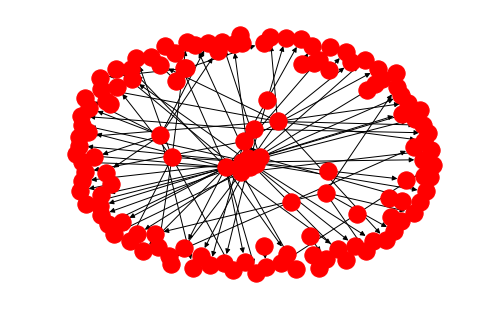

In [9]:
nx.draw(rnu.ntw)